In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import Methods as ms
from Methods import CGT

## Construct CGT Objects (at different T)

In [2]:
#Temperatures tested
temps = [0.5, 1, 2, 5]

In [3]:
#T = 0.5
f = [0, 0.5, 1, 2, 5]
t = 0.5
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT05'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT05'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)

CGT05 = CGT(f, t, Rgpaths, Reepaths)

In [26]:
#T = 1
f = [0, 0.5, 1, 2, 5]
t = 1
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT1'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT1'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)

CGT1 = CGT(f, t, Rgpaths, Reepaths)

In [28]:
#T = 2
f = [0,  0.5, 1, 2, 5]
t = 2
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT2'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT2'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)

CGT2 = CGT(f, t, Rgpaths, Reepaths)

In [6]:
#T = 5
f = [0,  0.5, 1, 2, 5]
t = 5
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT5'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT5'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)

CGT5 = CGT(f, t, Rgpaths, Reepaths)

## Tf-Extension under constant force

In [9]:
lsCGT = [CGT05,CGT1,CGT2,CGT5]
forces = ms.lsForces(lsCGT)
print(forces)

[0, 0.5, 1, 2, 5]


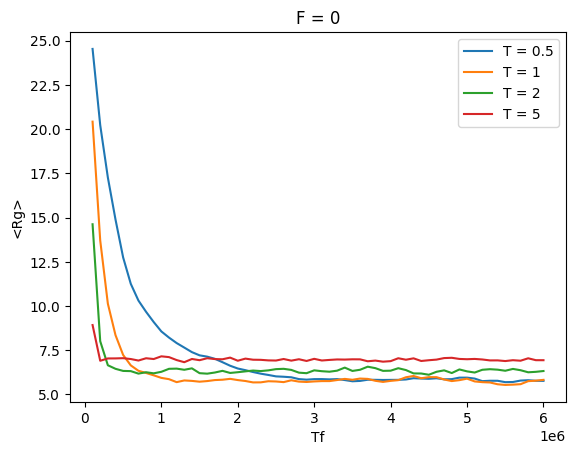

In [10]:
ms.Plot(lsCGT, 0, "Rg")

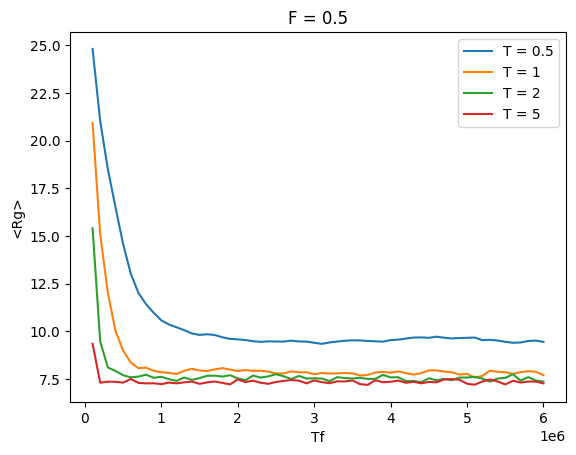

In [11]:
ms.Plot(lsCGT, 0.5, "Rg")

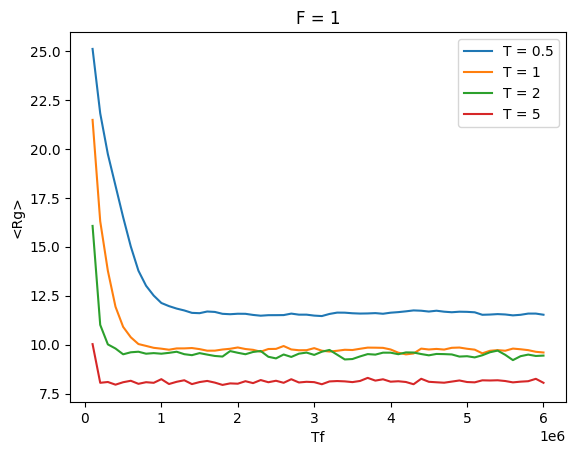

In [12]:
ms.Plot(lsCGT, 1, "Rg")

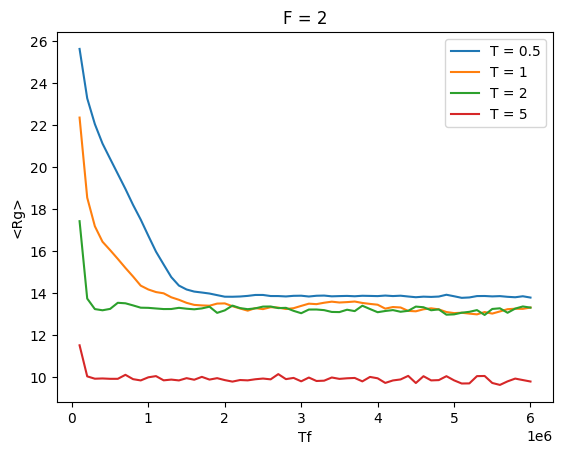

In [13]:
ms.Plot(lsCGT, 2, "Rg")

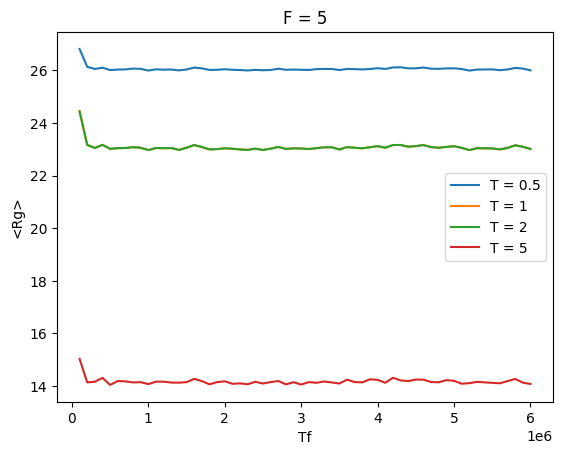

In [30]:
ms.Plot(lsCGT, 5, "Rg")

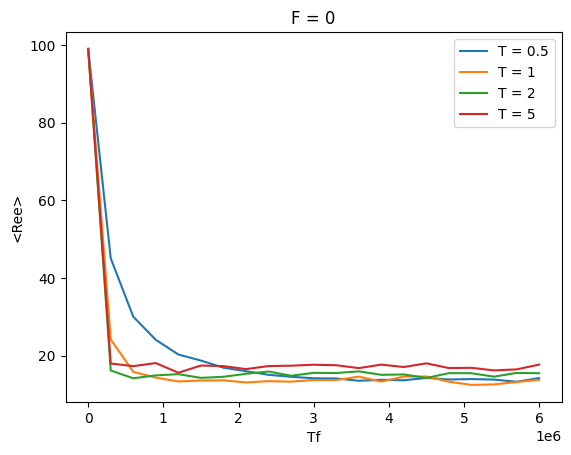

In [15]:
ms.Plot(lsCGT, 0, "Ree")

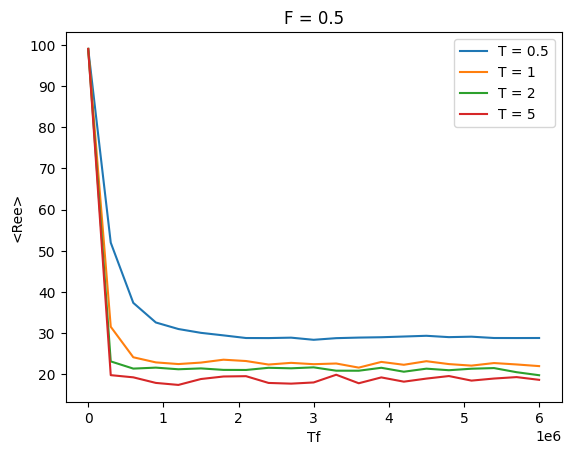

In [16]:
ms.Plot(lsCGT, 0.5, "Ree")

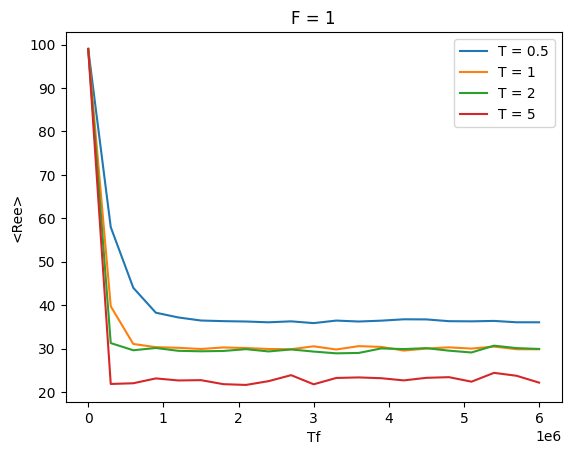

In [17]:
ms.Plot(lsCGT, 1, "Ree")

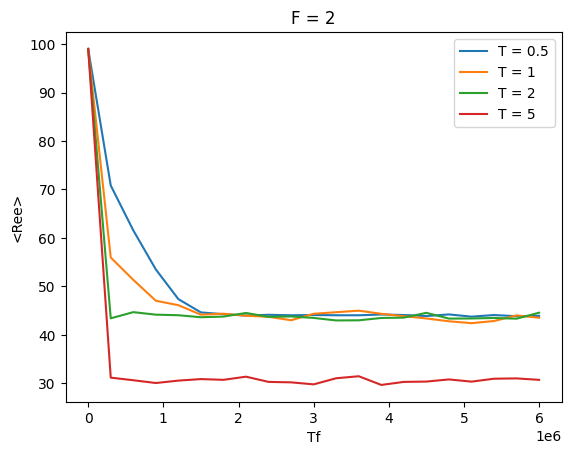

In [18]:
ms.Plot(lsCGT, 2, "Ree")

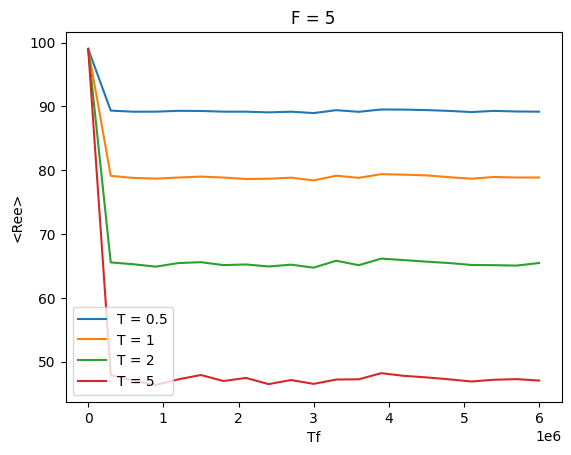

In [19]:
ms.Plot(lsCGT, 5, "Ree")

## Temperature Extension

Text(0.5, 1.0, 'Temperature vs Rg')

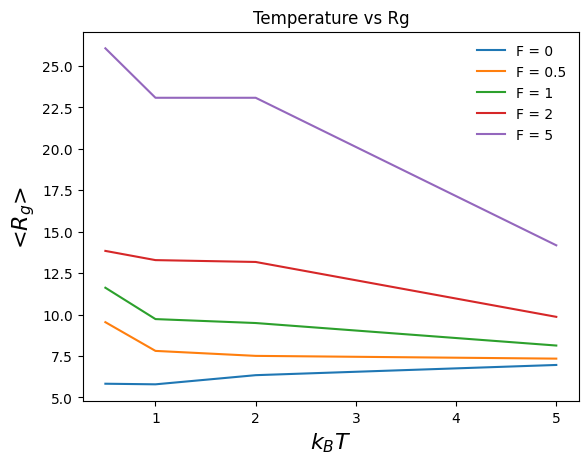

In [22]:
for f in forces:
    data = []
    for cgt in lsCGT:
        i = cgt.f.index(f)
        data.append(cgt.aveRg[i])
    plt.plot(temps, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{g}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Rg")
# plt.savefig('../Data/Block50/Figures/TvsRg')

Text(0.5, 1.0, 'Temperature vs Ree')

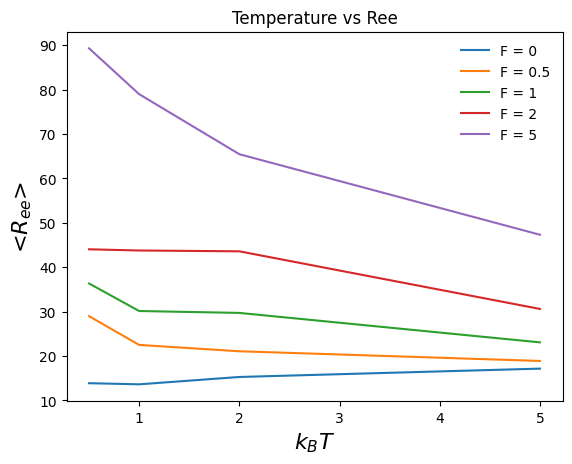

In [21]:
for f in forces:
    data = []
    for cgt in lsCGT:
        i = cgt.f.index(f)
        data.append(cgt.aveRee[i])
    plt.plot(temps, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{ee}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Ree")
# plt.savefig('../Data/Block50/Figures/TvsRee')

## Force Extension

Text(0.5, 1.0, 'Force-Rg')

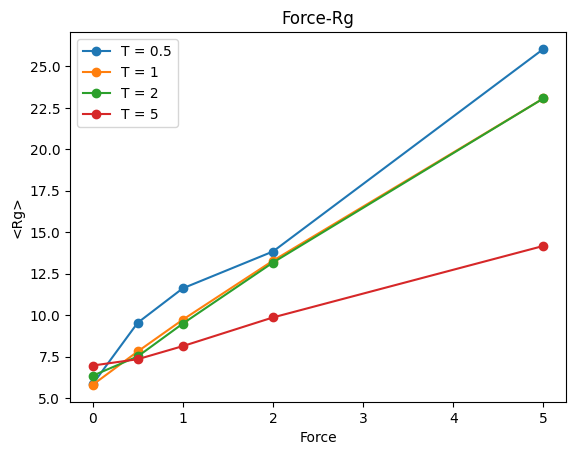

In [23]:
#Rg
for cgt in lsCGT:
    plt.plot(cgt.f, cgt.aveRg, 'o-', label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Rg>')
plt.title('Force-Rg')
# plt.savefig('../Data/Block50/Figures/FvsRg')

Text(0.5, 1.0, 'Force-Ree')

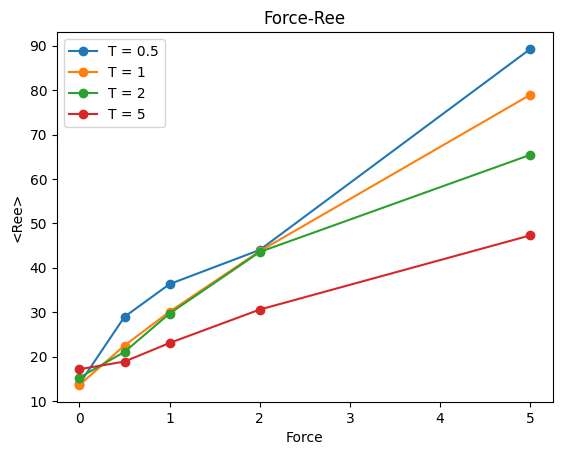

In [24]:
#Ree
for cgt in lsCGT:
    plt.plot(cgt.f, cgt.aveRee, 'o-', label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Ree>')
plt.title('Force-Ree')
# plt.savefig('../Data/Block50/Figures/FvsRee')

Text(0.5, 1.0, 'fb/kT vs. Ree')

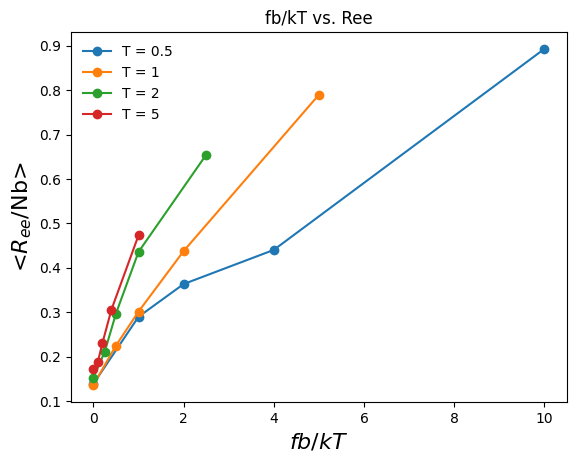

In [25]:
for cgt in lsCGT:
    force = np.array(cgt.f)
    Ree = np.array(cgt.aveRee)
    plt.plot(force / cgt.t, Ree / 100, 'o-', label = 'T = ' + str(cgt.t))

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title("fb/kT vs. Ree")
# plt.savefig('../Data/Block50/Figures/Fbkt vs Ree')